<a href="https://colab.research.google.com/github/Govind-kumawat2002/Ann/blob/main/03_04_07_ANN_implementation_using_tf_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
# ROOT = "/content/drive/MyDrive/001_SUNNY_BHAVEEN_CHANDRA/oneNeuronDemoDir"
# os.chdir(ROOT)

In [3]:
os.listdir()

['.config', 'sample_data']

In [4]:
import tensorflow as tf

In [5]:
tf.__version__

'2.17.0'

In [6]:
tf.keras.__version__

'3.4.1'

In [7]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## A Simple classifier using keras's Sequential API

### Dataset MNIST

* Its a dataset of handwritten digits
* each data point it 2d array of 28x28
* It has 10 classes 0-9
* aka hello world for ANN

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os

In [9]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [10]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [11]:
y_train_full.shape, y_train_full.dtype

((60000,), dtype('uint8'))

In [12]:
X_test.shape, X_test.dtype

((10000, 28, 28), dtype('uint8'))

In [13]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [14]:
X_valid, X_train = X_train_full[: 5000] / 255., X_train_full[5000: ]/255.
y_valid, y_train = y_train_full[: 5000], y_train_full[5000:]

X_test = X_test/255.

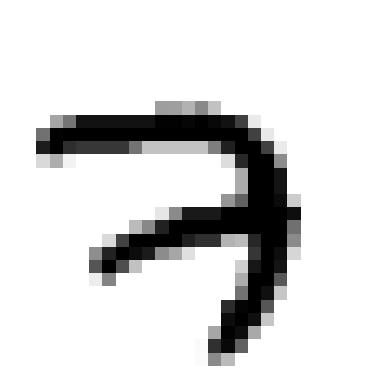

7

In [15]:
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()
y_train[0]

<Axes: >

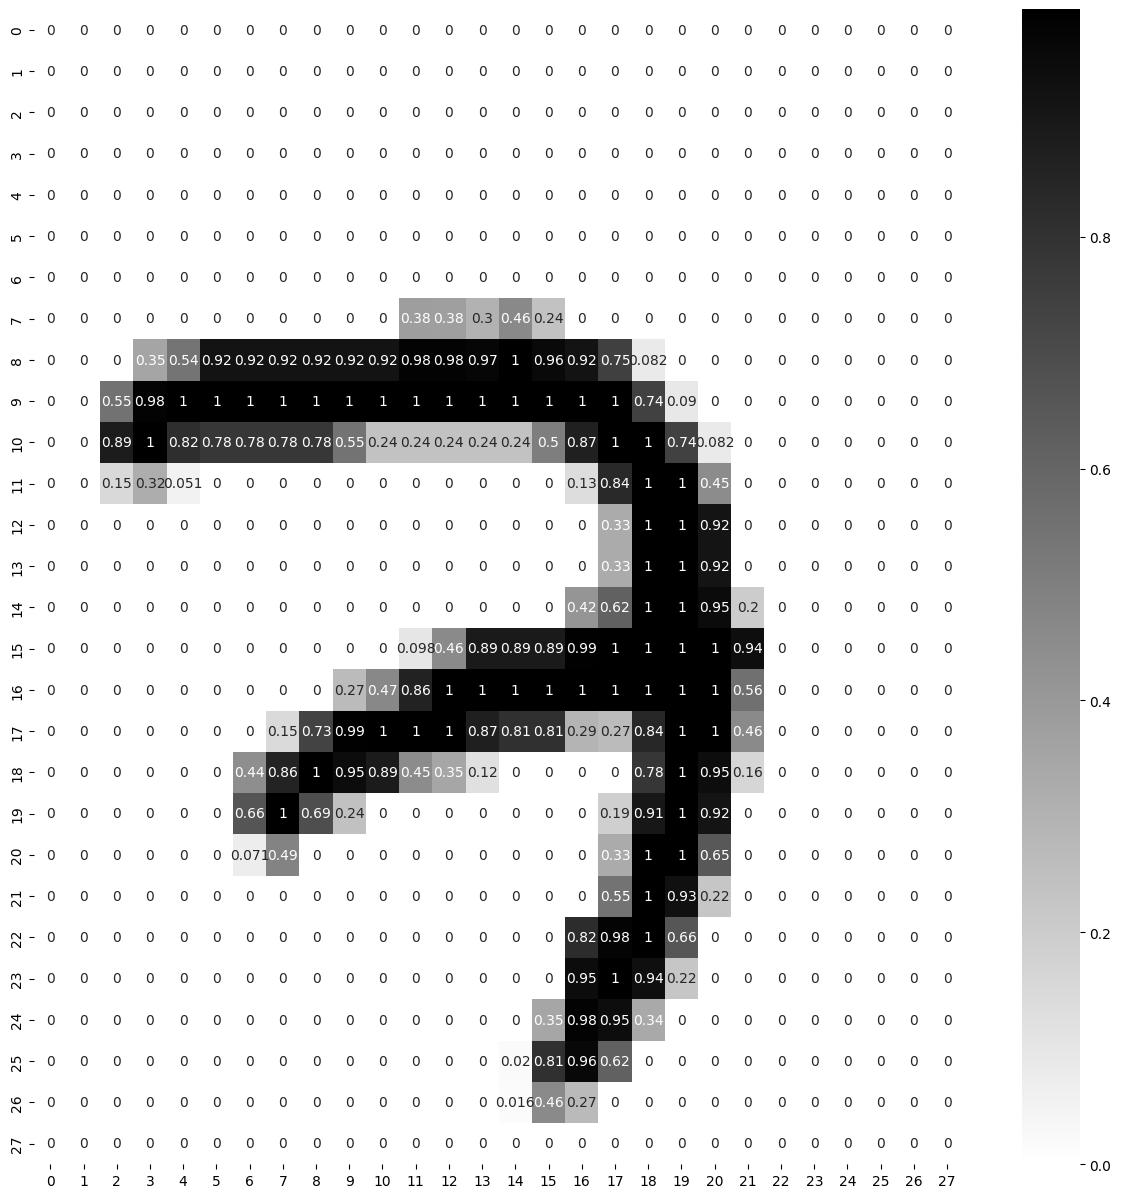

In [16]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

In [17]:
LAYERS = [
          tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"),

]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model = tf.keras.models.Sequential(LAYERS)

In [19]:
model.layers

[<Flatten name=inputLayer, built=True>,
 <Dense name=hiddenLayer1, built=True>,
 <Dense name=hiddenLayer2, built=True>,
 <Dense name=outputLayer, built=True>]

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [20]:
784 * 300 + 300, 300 * 100 + 100, 100 * 10 + 10

(235500, 30100, 1010)

In [21]:
sum([784 * 300 + 300, 300 * 100 + 100, 100 * 10 + 10])

266610

In [22]:
hidden1 = model.layers[1]

model.get_layer(hidden1.name)

<Dense name=hiddenLayer1, built=True>

In [23]:
hidden1.get_weights()

[array([[-0.05874877, -0.05430128, -0.05985813, ..., -0.02021399,
          0.05069529,  0.06404862],
        [-0.05034716,  0.03294393, -0.03346459, ...,  0.05602385,
         -0.00758471,  0.00046457],
        [-0.01623345, -0.05141578, -0.05915645, ...,  0.05366437,
          0.03714131,  0.03001773],
        ...,
        [-0.07143088,  0.03870568,  0.02903956, ...,  0.04238631,
         -0.04414916, -0.05576089],
        [ 0.01672266, -0.06640349, -0.05309055, ..., -0.01844185,
          0.01689225, -0.04137931],
        [ 0.0442216 ,  0.03072828,  0.0084606 , ..., -0.01574203,
          0.02785751, -0.05784007]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [24]:
weights, biases = hidden1.get_weights()

In [25]:
weights.shape

(784, 300)

In [26]:
biases.shape

(300,)

$loss\_function(actual, pred) = error$

In [27]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


### Important -

* **Epochs**: Integer.
    
    Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided.

* **batch_size**: Integer or None.
    
    Number of samples per gradient update. If unspecified, batch_size will default to 32.
    
    *NOTE:* Do not specify the batch_size if your data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches).

* **validation_batch_size**: Integer or None.

    Number of samples per validation batch.
    
    If unspecified, will default to batch_size.
    
    *NOTE:* Do not specify the validation_batch_size if your data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches).

[Reference](https://www.tensorflow.org/api_docs/python/tf/keras/Model?hl=zh-tw#fit)

In [28]:
EPOCHS = 10
VALIDATION_SET = (X_valid, y_valid)

history = model.fit(X_train, y_train,
                    epochs=EPOCHS,
                    validation_data=VALIDATION_SET)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7341 - loss: 1.0179 - val_accuracy: 0.9178 - val_loss: 0.3019
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9132 - loss: 0.3071 - val_accuracy: 0.9340 - val_loss: 0.2392
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9299 - loss: 0.2416 - val_accuracy: 0.9426 - val_loss: 0.2042
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9432 - loss: 0.2035 - val_accuracy: 0.9508 - val_loss: 0.1796
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9495 - loss: 0.1770 - val_accuracy: 0.9584 - val_loss: 0.1605
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9567 - loss: 0.1561 - val_accuracy: 0.9596 - val_loss: 0.1483
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9572 - loss: 0.1470 - val_accuracy: 0.9642 - val_loss: 0.1318
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9638 - loss: 0.1300 - 

In [29]:
55000 / 16

3437.5

In [30]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9616 - loss: 0.1360


[0.11398328840732574, 0.9672999978065491]

In [31]:
model.save("model.h5")

In [32]:
loaded_model = tf.keras.models.load_model("model.h5")

In [33]:
loaded_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9616 - loss: 0.1360


[0.11398328840732574, 0.9672999978065491]

In [34]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.844109,0.603419,0.9178,0.301932
1,0.918236,0.287358,0.9340,0.239196
2,0.931964,0.236212,0.9426,0.204157
3,0.943109,0.201069,0.9508,0.179622
4,0.949364,0.175751,0.9584,0.160485
5,0.955618,0.155342,0.9596,0.148281
6,0.959727,0.139480,0.9642,0.131815
7,0.963964,0.126501,0.9662,0.124851
8,0.967564,0.115036,0.9672,0.120689
9,0.970236,0.105248,0.9700,0.111452


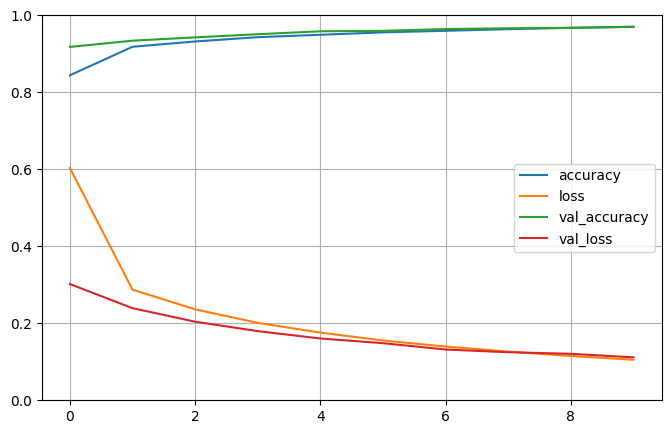

In [35]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [36]:
X_new = X_test[:3]
y_new = y_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [37]:
y_pred = np.argmax(y_proba, axis=-1)
y_pred, y_new

(array([7, 2, 1]), array([7, 2, 1], dtype=uint8))

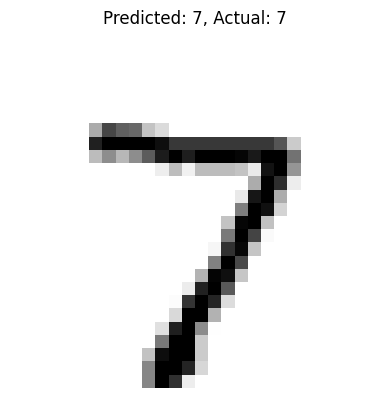

------------------------------------------------------------


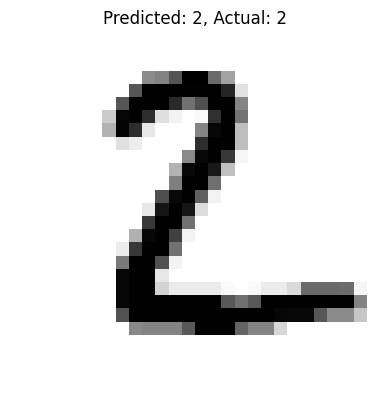

------------------------------------------------------------


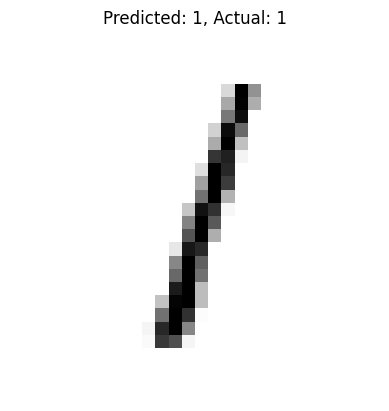

------------------------------------------------------------


In [38]:
for data, pred, actual in zip(X_new, y_pred, y_new):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted: {pred}, Actual: {actual}")
  plt.axis("off")
  plt.show()
  print("---"*20)

In [39]:
git add .


SyntaxError: invalid syntax (<ipython-input-39-3d6cfb4a5e4d>, line 1)